In [1]:
%run ../common/import_all.py

from common.setup_notebook import *
config_ipython()
setup_matplotlib()
set_css_style()

# <center> Moments of a distribution and related quantities

In the following, we will use $X$ to represent a random variable living in sample space (the space of all possible values it can assume) $\Omega$.

In the discrete case, the probability of each value $x_i$ will be represented as $p_i$ (probability mass function); in the continuous case $p(x) = P(X=x)$ will be the probability density function. See [the note on probability functions](probfunctions.ipynb).

Let's start with mean and variance and then we'll then give the general definitions.

## Expected Value

The **expected value**, or **expectation**, or **mean value** is defined, in the *continuous* case as

$$
\mathbb{E}[X] = \int_\Omega \text{d} x \ x p(x) \ ,
$$

Similarly, in the *discrete* case,

$$
\mathbb{E}[X] = \sum_i^N p_i x_i \ ,
$$

The expectation is the average of all the possible values the random variable can assume. It is the arithmetic mean in the case of discrete variables. This is easy to see if the distribution is uniform, that is, all $N$ values have the same probability $\frac{1}{N}$: the expectation becomes $\frac{1}{N}\sum_i x_i$, which is the exact definition of arithmetic mean. When the distribution is not uniform, the probability is not the same for each value, but the end result is still the arithmetic mean as each different value will be weighted with its probability of occurrence, that is, the count of them over the total of values. 

The expected value is typically indicated with $\mu$. 

### Linearity of the expected value

The expected value is a linear operator:

$$
\mathbb{E}[aX + bY] = a\mathbb{E}[X] + b \mathbb{E}[Y]
$$

*Proof*

We will prove this in the continuous case but it is clearly easily extensible.

$$
\begin{align}
\mathbb{E}[aX + bY] &= \int_{\Omega_X}\limits \int_{\Omega_Y}\limits \text{d} x \ \text{d} y \ (ax + by) p(x, y) \\
&= a \int_{\Omega_X}\limits \int_{\Omega_Y}\limits \text{d} x \ \text{d} y \ x p(x, y) + b \int_{\Omega_X}\limits \int_{\Omega_Y}\limits \text{d} x \ \text{d} y \ y p(x, y) \\
&= a \int_{\Omega_X}\limits \text{d} x \ x p(x) + b \int_{\Omega_Y}\limits \text{d} y \ y p(y) \\
&= a\mathbb{E}[X] + b \mathbb{E}[Y]
\end{align}
$$

This is because $p(x) = \int_{\Omega_Y}\limits\text{d} y \  x p(x, y)$ because we are effectively summing the PDFs over all the possible values of $Y$, hence eliminating the dependency from this random variable. Analogously the other one.

## Variance and standard deviation

The variance is the expected value of the squared difference from the expectation:

$$
Var[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] =  \int_{\Omega_X} \text{d} x \ (x - \mathbb{E}[X])^2 p(x)
$$

The variance is the second moment around the mean. It is typically indicated as $\sigma^2$, $\sigma$ being the **standard deviation**, which gives the measure of error of values from the mean.

### Rewriting the variance

We can also write the variance as

$$
Var[X] = \mathbb{E}[X^2] - \big(\mathbb{E}[X]\big)^2
$$

*Proof*

$$
\begin{align}
Var[X] &= \mathbb{E}[(X - \mu)^2] \\
&= \int_{\Omega_X} \text{d}x \ (x^2 - 2 \mu x + \mu^2) p(x) \\
&= \int_{\Omega_X} \text{d}x \ x^2 p(x) -2 \mu \int_{\Omega_X} \text{d}x \ x p(x) + \mu^2 \int_{\Omega_X} \text{d} x p(x) \\
&= \mathbb{E}[X^2] - 2 \mu^2 + \mu^2 \\
&= \mathbb{E}[X^2] - \big(\mathbb{E}[X]\big)^2
\end{align}
$$

### The variance is not linear

In fact, using the linearity of the expectation

$$
\begin{align}
Var[aX] &= \mathbb{E}[(aX)^2] - \big( \mathbb{E}[aX] \big)^2 \\
&= a^2 \mathbb{E}[X^2] - (a^2 \mu^2)
\end{align}
$$

## General definitions of moments


The $n$-th **raw moment** is the expected value of the $n$-th power of the random variable:

$$
\boxed{\mu_n' = \int \text{d} x \ x^n p(x)}
$$

The expected value is then the first raw moment.


The $n$-th **central moment** around the mean is defined as

$$
\boxed{\mu_n = \int \text{d} x (x-\mu)^n p(x)}
$$

The variance is the second central moment around the mean.

Moments get standardises (normalised) by dividing for the appropriate power of the standard deviation. The $n$-th **standardised moment** is the central moment divided by standard deviation with the same order power:

$$
\boxed{\tilde \mu_n = \frac{\mu_n}{\sigma^n}}
$$

## Skeweness

The **skeweness** is the third standardised moment:

$$
\gamma = \frac{\mathbb{E}[(X-\mu)^3]}{\sigma^3}
$$

The skeweness quantifies how symmetrical a distribution is around the mean: it is zero in the case of a perfectly symmetrical shape. It is positive if the distribution is skewed on the right, that is, if the right tail is heavier than the left one; it is negative if it is skewed on the left, meaning the left tail is heavier than the right one.

## Kurtosis

The **kurtosis** is the fourth standardised moment:

$$
\kappa = \frac{\mu_4}{\sigma^4}
$$

It measures how heavy the tail of a distribution is with respect to a gaussian with the same $\sigma$.

## Further results

### Variance of a matrix of constants times a random vector

In general, with a matrix of constants $\mathbf{X}$ and a vector of observations (random variables) $\mathbf{a}$, using the linearity of the expected value so that $\mathbb{E}[\mathbf{X a}] = \mathbf{X} \mathbb{E}[\mathbf{a}]$, we have

$$
\begin{align}
    Var[\mathbf{X a}] &= \mathbb{E}[(\mathbf{X a} - \mathbb{E}[\mathbf{X a}])^2] \\
                      &= \mathbb{E}[(\mathbf{X a} - \mathbb{E}[\mathbf{X a}])(\mathbf{X a} - \mathbb{E}[\mathbf{X a}])^t] \\ 
                      &= \mathbb{E}[(\mathbf{X a} - \mathbf{X}\mathbb{E}[\mathbf{a}])(\mathbf{X a} - \mathbf{X}\mathbb{E}[\mathbf{a}])^t] \\
                      &= \mathbb{E}[(\mathbf{X a} - \mathbf{X}\mathbb{E}[\mathbf{a}])((\mathbf{X a})^t - (\mathbf{X}\mathbb{E}[\mathbf{a}])^t)] \\
                      &= \mathbb{E}[\mathbf{Xa}\mathbf{a}^t\mathbf{X}^t - \mathbf{Xa} \mathbb{E}[\mathbf{a}]^t \mathbf{X}^t - \mathbf{X} \mathbb{E}[\mathbf{a}]\mathbf{a}^t\mathbf{X}^t + \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}]^t\mathbf{X}^t] \\
                      &=  \mathbf{X} \mathbb{E}[\mathbf{a}\mathbf{a}^t] \mathbf{X}^t - \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}]^t \mathbf{X}^t - \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}^t] \mathbf{X}^t + \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}^t] \mathbf{X}^t \\
                      &= \mathbf{X} \mathbb{E}[\mathbf{a}\mathbf{a}^t] \mathbf{X}^t - 2 \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}]^t \mathbf{X}^t + \mathbf{X} \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}^t] \mathbf{X}^t = \\
                      &= \mathbf{X} (\mathbb{E}[\mathbf{a} \mathbf{a}^t] - \mathbb{E}[\mathbf{a}] \mathbb{E}[\mathbf{a}^t]) \mathbf{X}^t = \\
                      &= \mathbf{X} Var[\mathbf{a}] \mathbf{X}^t
\end{align}
$$

## Let's see all this on some known distributions!

We will extract $n$ values from several distributions, one at a time, and see what happens to the moments.

In [149]:
n = 100000                                                          # the number of points to extract

g = np.random.normal(size=n)                                           # gaussian
e = np.random.exponential(size=n)                                      # exponential
p = np.random.power(a=0.5, size=n)                                     # power-law x^{0.5}, or a sqrt
z = np.random.zipf(a=2, size=n)                                        # Zipf (power-law) x^{-2}

### Her majesty the gaussian

The gaussian will be the comparison distribution we refer to .

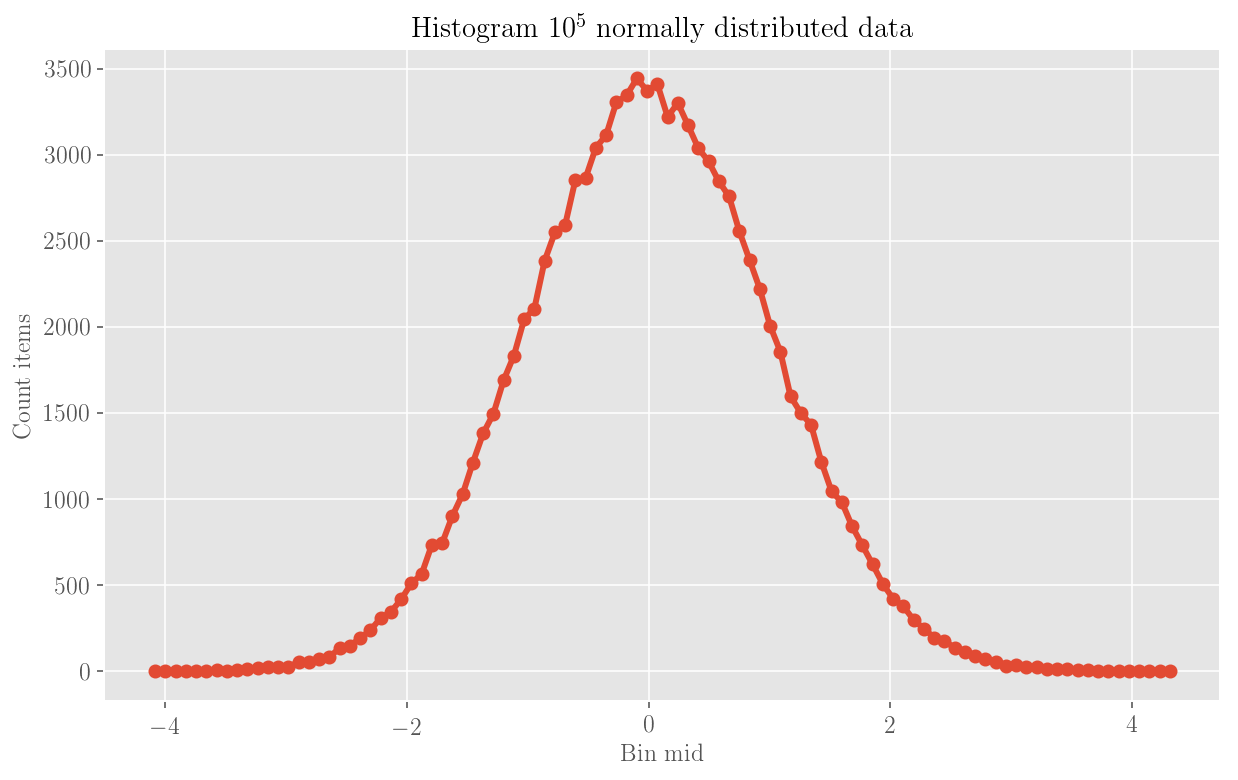

In [150]:
# Use 100 bins
bins = 100    

hist = np.histogram(g, bins=bins)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]     # middle point of bin
  
plt.plot(bin_mids, hist_vals, marker='o')

plt.title('Histogram $10^5$ normally distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

In [151]:
'The mean is %s, the std %s' % (np.mean(g), np.std(g))
'The skeweness is %s, the kurtosis %s' % (stats.skew(g), stats.kurtosis(g))

'The mean is -0.000640742485484, the std 0.999986499155'

'The skeweness is 0.01838211229141485, the kurtosis -0.025766042470362294'

Clearly, the mean is 0 (we've taken values this way!); the skeweness is also 0 as the data is normally distributed, hence symmetrical, and the kurtosis comes as 0 because Scipy gives, [by default](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html), the Fisher version of it, which subtracts 3 so that a normal distribution has 0 kurtosis.

### The exponential

Same plot as for the gaussian, except that we will also plot it in semilog scale (on the $y$), where the distribution appears linear.

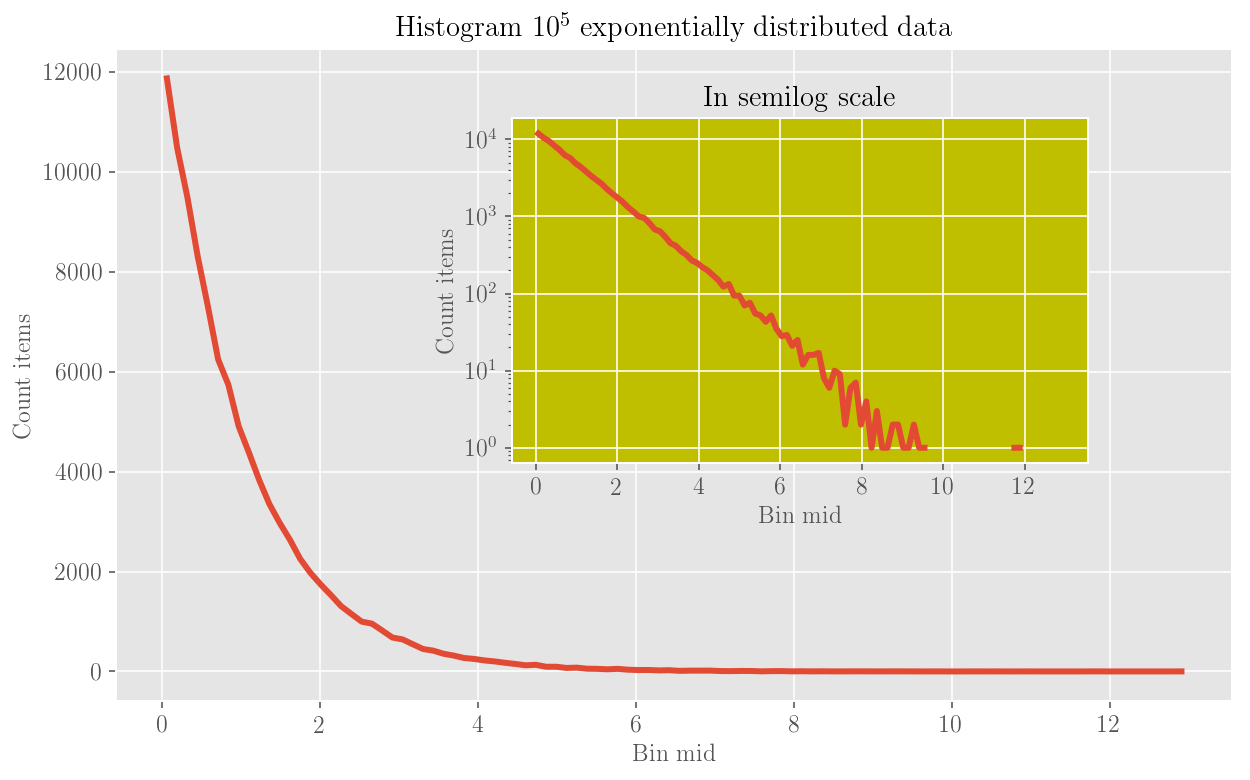

In [152]:
# Use 100 bins
bins = 100    

hist = np.histogram(e, bins=bins)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]     # middle point of bin

# Main plot: in linear scale
plt.plot(bin_mids, hist_vals)
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.title('Histogram $10^5$ exponentially distributed data')

# Inset plot: in semilog (on y)
a = plt.axes([.4, .4, .4, .4], facecolor='y')
plt.semilogy(bin_mids, hist_vals)
plt.title('In semilog scale')
plt.ylabel('Count items')
plt.xlabel('Bin mid')

plt.show();

In [153]:
'The mean is %s, the std %s' % (np.mean(e), np.std(e))
'The skeweness is %s, the kurtosis %s' % (stats.skew(e), stats.kurtosis(e))

'The mean is 1.00304878455, the std 0.996973171878'

'The skeweness is 1.9954113378643468, the kurtosis 6.02308754016868'

This time, the distribution is not symmetrical.

### The power law

We chose to extract numbers from a [power law](power-law.ipynb) with exponent $-0.7$ (see the [docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.power.html#numpy.random.power)). Because of this, it is so much better to bin logarithmically, that is, with a bin width growing logarithmically. If we also choose a log-log scale, we get a line. Let's do it.

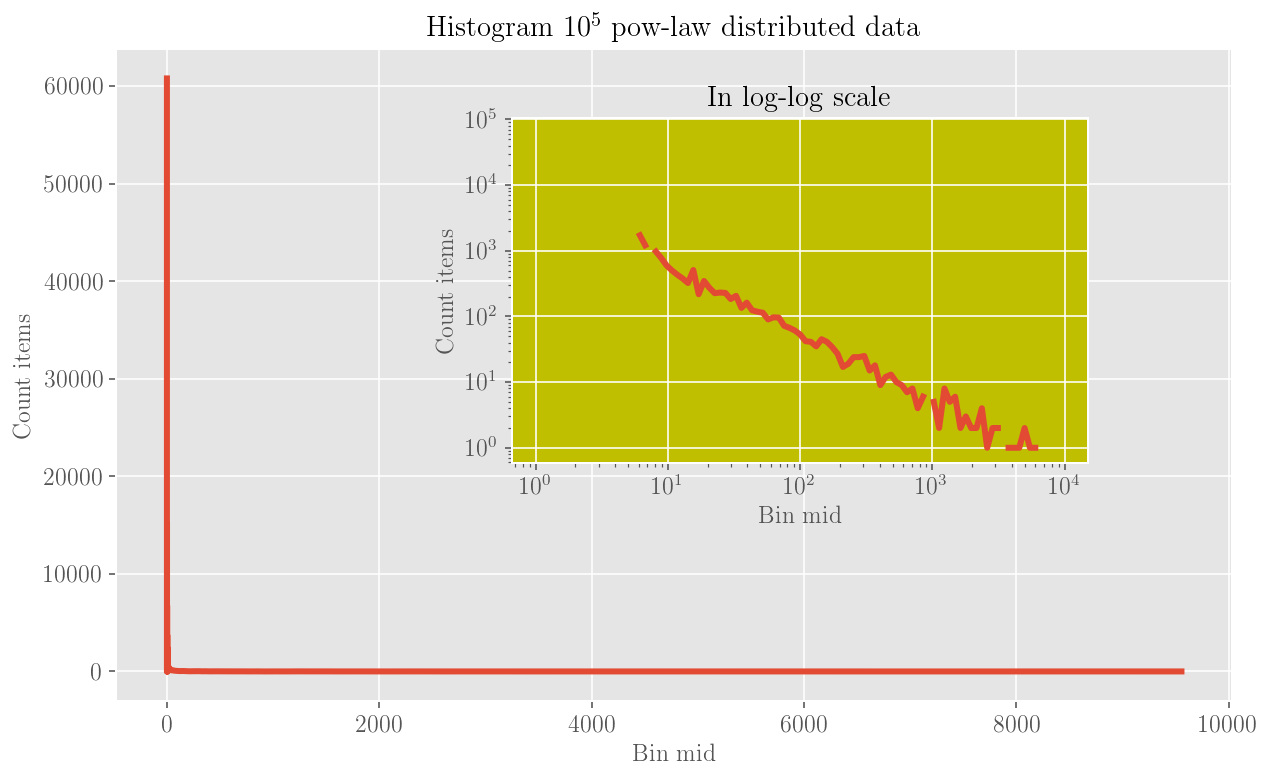

In [160]:
# Use 100 bins
bins = np.logspace(0, 4, num=100)    

hist = np.histogram(z, bins=bins)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]     # middle point of bin

# Main plot: in linear scale
plt.plot(bin_mids, hist_vals)
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.title('Histogram $10^5$ pow-law distributed data')

# Inset plot: in semilog (on y)
a = plt.axes([.4, .4, .4, .4], facecolor='y')
plt.loglog(bin_mids, hist_vals)
plt.title('In log-log scale')
plt.ylabel('Count items')
plt.xlabel('Bin mid')

plt.show();

Clearly because it is a power law, a linear graph is really useless, can't really see anything. The inset shows the linear trend in log-log scale.

In [157]:
'The mean is %s, the std %s' % (np.mean(z), np.std(z))
'The skeweness is %s, the kurtosis %s' % (stats.skew(z), stats.kurtosis(z))

'The mean is 37.28617, the std 7991.95971848'

'The skeweness is 299.37959397823863, the kurtosis 92083.86568826315'

Now, this is a heavy-tail, and the kurtosis is quite verbal about it.